In [6]:
import tensorflow as tf
print("using tensorflow version",tf.__version__ )

using tensorflow version 2.10.0


In [7]:
from tensorflow.keras.datasets import mnist 
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [8]:
print('x_train shape:',x_train.shape)

x_train shape: (60000, 28, 28)


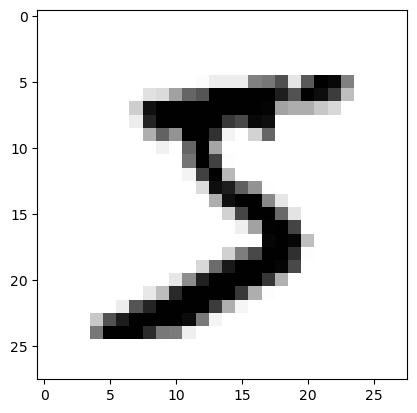

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0],cmap='binary')
plt.show()

In [10]:
y_train[0]


5

In [11]:
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


In [12]:
from tensorflow.keras.utils import to_categorical

y_train_encoded=to_categorical(y_train)
y_test_encoded=to_categorical(y_test)

In [13]:
print('y_train_encoded shape:',y_train_encoded.shape)
print('y_test_encoded shape:',y_test_encoded.shape)

y_train_encoded shape: (60000, 10)
y_test_encoded shape: (10000, 10)


In [14]:
y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
import numpy as np 
x_train_reshaped=np.reshape(x_train,(60000,784))
x_test_reshaped=np.reshape(x_test,(10000,784))

print(x_train_reshaped.shape,x_test_reshaped.shape)

(60000, 784) (10000, 784)


In [16]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


In [17]:
x_mean=np.mean(x_train_reshaped)
x_std=np.std(x_train_reshaped)

epsilon= 1e-10

x_train_norm=(x_train_reshaped-x_mean)/(x_std+epsilon)
x_test_norm=(x_test_reshaped-x_mean)/(x_std+epsilon)

In [18]:
print(set(x_train_norm[1]))

{0.2632332858605251, 1.5996639141274305, 2.7960875241949457, 2.6051688630139593, 2.7833596134495466, 2.5924409522685603, 2.465161844814569, 2.6178967737593584, 2.5415293092869637, 2.426978112578372, 1.7142151108360224, 2.668808416740955, 2.057868700961798, 1.421473163691843, 1.1287312165476637, 0.059586713934139515, 2.7451758812133495, 2.1087803439433945, 0.5432473222593053, 0.2250495536243278, -0.18224359022844336, 1.2305545025108566, 2.5033455770507667, 0.3014170180967224, 2.31242691586978, 1.676031378599825, -0.4240738943910262, 0.18686582138813052, -0.05496448277445237, -0.33497851917323257, -0.29679478693703526, 2.070596611707197, 2.706992148977152, 2.4142502018329726, 1.7778546645630178, 1.4342010744372422, 1.2432824132562557, 2.2233315406519862, 1.294194056237852, 0.6577985189678972, 1.9815012364894034, 1.0014521090936728, 1.6378476463636278, -0.27133896544623703, 0.7978055371672873, 0.4796077685323098, 0.5305194115139061, 0.6450706082224981, 2.477889755559968, 2.821543345685743

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential([
    Dense(128,activation='relu',input_shape=(784,)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [20]:
model.compile(optimizer='sgd',
             loss='categorical_crossentropy',
             metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train_norm,y_train_encoded,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3750 - accuracy: 0.8918
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1834 - accuracy: 0.9462
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1388 - accuracy: 0.9592


In [22]:
loss,accuracy=model.evaluate(x_test_norm,y_test_encoded)
print('Test set accuracy:',accuracy*100)

313/313 [==============================] - 2s 4ms/step - loss: 0.1335 - accuracy: 0.9587
Test set accuracy: 95.87000012397766


In [23]:
preds=model.predict(x_test_norm)
print('shape of preds:',preds.shape)

313/313 [==============================] - 1s 2ms/step
shape of preds: (10000, 10)


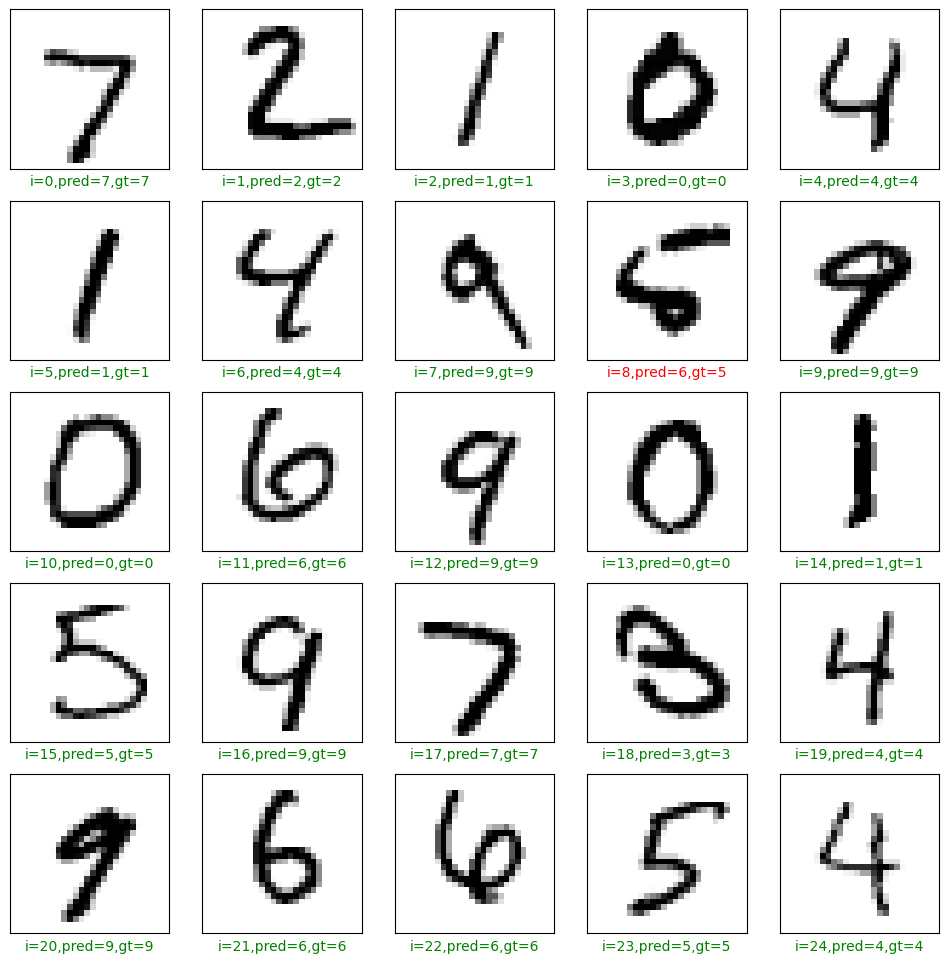

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np 

plt.figure(figsize=(12,12))

start_index=0

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred=np.argmax(preds[start_index+i])
    gt=y_test[start_index+i]
    
    col='g'
    if pred!= gt:
        col='r'
        
    plt.xlabel('i={},pred={},gt={}'.format(start_index+i,pred,gt),color=col)
    plt.imshow(x_test[start_index+i],cmap='binary')
    
plt.show()